In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
import pandas as pd
import csv


df = pd.read_csv(
    "/content/exports-to-american-countries.csv",
    on_bad_lines='skip',
    quotechar='"',
    engine='python'
)

top_100_commodities = (
    df.groupby('commodity')['value_qt']
    .sum()
    .sort_values(ascending=False)
    .head(100)
    .index
)


filtered_df = df[df['commodity'].isin(top_100_commodities)]


print(filtered_df)


filtered_df.to_csv('top_100_commodities_full_data.csv', index=False)

            id        date         country_name alpha_3_code  country_code  \
9            9  2015-01-01  Antigua and Barbuda          ATG          28.0   
13          13  2015-01-01  Antigua and Barbuda          ATG          28.0   
24          24  2015-01-01            Argentina          ARG          32.0   
27          27  2015-01-01            Argentina          ARG          32.0   
29          29  2015-01-01            Argentina          ARG          32.0   
...        ...         ...                  ...          ...           ...   
415225  415225  2017-05-01               Brazil          BRA          76.0   
415229  415229  2017-05-01               Brazil          BRA          76.0   
415230  415230  2017-05-01               Brazil          BRA          76.0   
415238  415238  2017-05-01               Brazil          BRA          76.0   
415247  415247  2017-05-01               Brazil          BRA          76.0   

          region  region_code                       sub_region 


# **FILTERED TOP 100 COMMODITIES**


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [147]:
dataFrame = pd.read_csv("/content/top_100_commodities_full_data.csv")

In [148]:
dataFrame.head()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
0,9,2015-01-01,Antigua and Barbuda,ATG,28.0,Americas,19,Latin America and the Caribbean,419,30049099,Other Medcne Put Up For Retail Sale N.E.S,Kgs,0.04,0.36,0.00
1,13,2015-01-01,Antigua and Barbuda,ATG,28.0,Americas,19,Latin America and the Caribbean,419,42022990,Others,Nos,0.09,1.23,0.00
2,24,2015-01-01,Argentina,ARG,32.0,Americas,19,Latin America and the Caribbean,419,12074090,Other Sesamum Seeds W/N Broken,Kgs,38.00,53.02,0.09
3,27,2015-01-01,Argentina,ARG,32.0,Americas,19,Latin America and the Caribbean,419,13023230,Guargum Treated And Pulverised,Kgs,38.00,65.45,0.11
4,29,2015-01-01,Argentina,ARG,32.0,Americas,19,Latin America and the Caribbean,419,20011000,Cucmbrs And Ghrkns Prpd/Prsvd By Acetic Acid,Kgs,15.20,9.32,0.01


**DESCRIPTIVE ANALYSIS OF THE DATA**

In [149]:
dataFrame.describe()

,id,country_code,region_code,sub_region_code,hs_code,value_qt,value_rs,value_dl
count,53232.000000,53228.000000,53232.0,53232.000000,5.323200e+04,53081.000000,53231.000000,50515.000000
mean,206535.917512,428.551045,19.0,291.828712,6.396800e+07,389.953839,450.443055,0.722013
std,120222.620484,303.599952,0.0,185.586323,2.130843e+07,2978.787950,4101.192087,6.397632
min,9.000000,28.000000,19.0,21.000000,3.023900e+06,0.000000,0.000000,0.000000
25%,102254.250000,136.000000,19.0,21.000000,5.205131e+07,0.200000,1.770000,0.000000
50%,206347.000000,340.000000,19.0,419.000000,6.403199e+07,5.000000,15.340000,0.030000
75%,311163.250000,780.000000,19.0,419.000000,8.462299e+07,54.000000,83.570000,0.140000
max,415247.000000,862.000000,19.0,419.000000,9.805900e+07,375361.800000,230801.310000,361.760000


In [150]:
dataFrame.shape

(53232, 15)

In [151]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53232 entries, 0 to 53231
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               53232 non-null  int64  
 1   date             53232 non-null  object 
 2   country_name     53232 non-null  object 
 3   alpha_3_code     53228 non-null  object 
 4   country_code     53228 non-null  float64
 5   region           53232 non-null  object 
 6   region_code      53232 non-null  int64  
 7   sub_region       53232 non-null  object 
 8   sub_region_code  53232 non-null  int64  
 9   hs_code          53232 non-null  int64  
 10  commodity        53232 non-null  object 
 11  unit             53232 non-null  object 
 12  value_qt         53081 non-null  float64
 13  value_rs         53231 non-null  float64
 14  value_dl         50515 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 6.1+ MB


**EDA PROCESS**

In [152]:
dataFrame.isnull().sum()

,0
id,0
date,0
country_name,0
alpha_3_code,4
country_code,4
region,0
region_code,0
sub_region,0
sub_region_code,0
hs_code,0


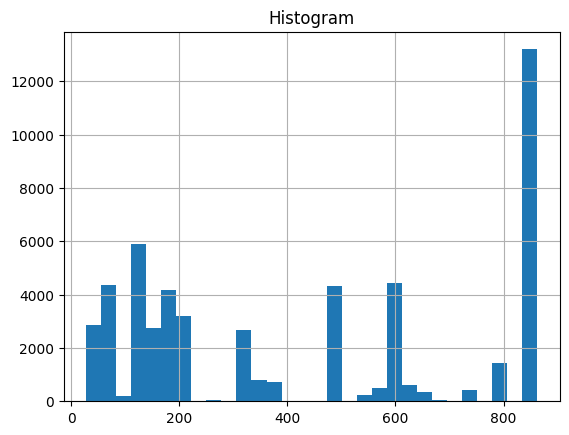

In [153]:
dataFrame['country_code'].hist(bins=30)
plt.title("Histogram")
plt.show()

AS THE DATA IN THE COUNTRY_CODE COLUMN IS NOT NORMALLY DISTRIBUTED, SO WE WILL  THE MISSING VALUE WITH MEDIAN OF THE COUNTRY_CODE COLUMN

In [154]:
dataFrame['country_code'] = dataFrame['country_code'].fillna(dataFrame['country_code'].median())

In [155]:
dataFrame = dataFrame.dropna(subset=['alpha_3_code'])


In [156]:
dataFrame.isnull().sum()

,0
id,0
date,0
country_name,0
alpha_3_code,0
country_code,0
region,0
region_code,0
sub_region,0
sub_region_code,0
hs_code,0


# Data Transformation


In [157]:
dataFrame['country_code'] = dataFrame['country_code'].astype(int)

In [158]:
dataFrame['country_code']

,country_code
0,28
1,28
2,32
3,32
4,32
...,...
53227,76
53228,76
53229,76
53230,76


In [159]:
dataFrame.head()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
0,9,2015-01-01,Antigua and Barbuda,ATG,28,Americas,19,Latin America and the Caribbean,419,30049099,Other Medcne Put Up For Retail Sale N.E.S,Kgs,0.04,0.36,0.00
1,13,2015-01-01,Antigua and Barbuda,ATG,28,Americas,19,Latin America and the Caribbean,419,42022990,Others,Nos,0.09,1.23,0.00
2,24,2015-01-01,Argentina,ARG,32,Americas,19,Latin America and the Caribbean,419,12074090,Other Sesamum Seeds W/N Broken,Kgs,38.00,53.02,0.09
3,27,2015-01-01,Argentina,ARG,32,Americas,19,Latin America and the Caribbean,419,13023230,Guargum Treated And Pulverised,Kgs,38.00,65.45,0.11
4,29,2015-01-01,Argentina,ARG,32,Americas,19,Latin America and the Caribbean,419,20011000,Cucmbrs And Ghrkns Prpd/Prsvd By Acetic Acid,Kgs,15.20,9.32,0.01


In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["value_qt", "value_rs", "value_dl"]] = scaler.fit_transform(df[["value_qt", "value_rs", "value_dl"]])


In [161]:
dframe = df.dropna(subset=['region_code'])
columns_to_keep = [col for col in dframe.columns if col not in ['region_code', 'region']]
filtered_dframe = dframe[columns_to_keep]

correlation_matrix = filtered_dframe.corr(numeric_only=True)

print(correlation_matrix)


                       id  country_code  sub_region_code   hs_code  value_qt  \
id               1.000000      0.012825         0.002382 -0.009487  0.003893   
country_code     0.012825      1.000000        -0.446423 -0.002917  0.042909   
sub_region_code  0.002382     -0.446423         1.000000  0.053950 -0.043322   
hs_code         -0.009487     -0.002917         0.053950  1.000000  0.004137   
value_qt         0.003893      0.042909        -0.043322  0.004137  1.000000   
value_rs         0.001772      0.045185        -0.044454 -0.000510  0.080125   
value_dl         0.000829      0.046011        -0.044839  0.000151  0.080170   

                 value_rs  value_dl  
id               0.001772  0.000829  
country_code     0.045185  0.046011  
sub_region_code -0.044454 -0.044839  
hs_code         -0.000510  0.000151  
value_qt         0.080125  0.080170  
value_rs         1.000000  0.999656  
value_dl         0.999656  1.000000  


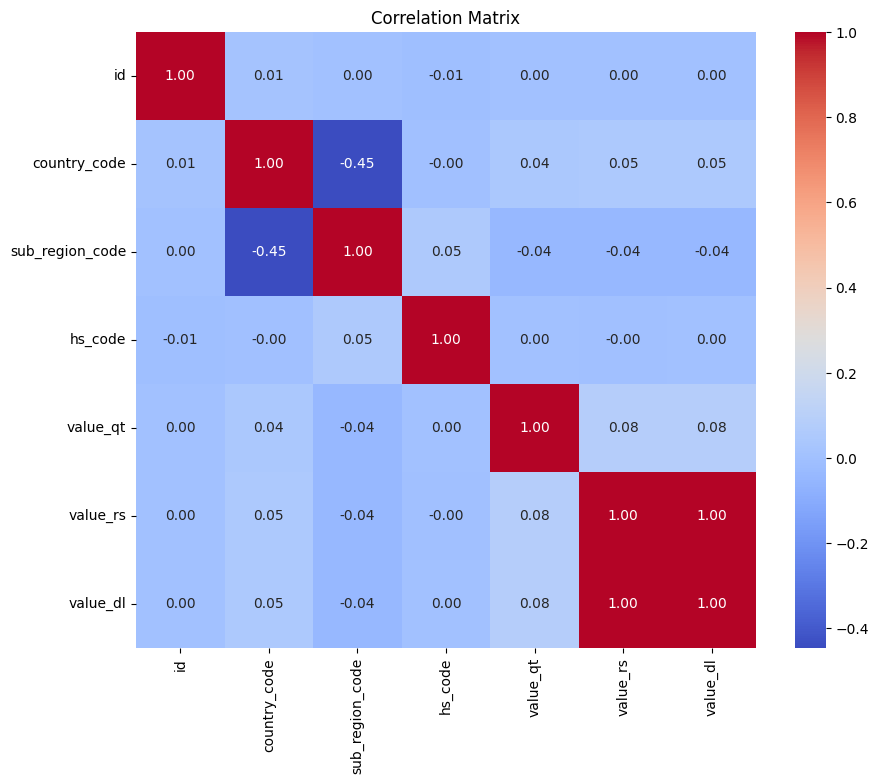

In [162]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Detecting the outliers using visualization or Z-score


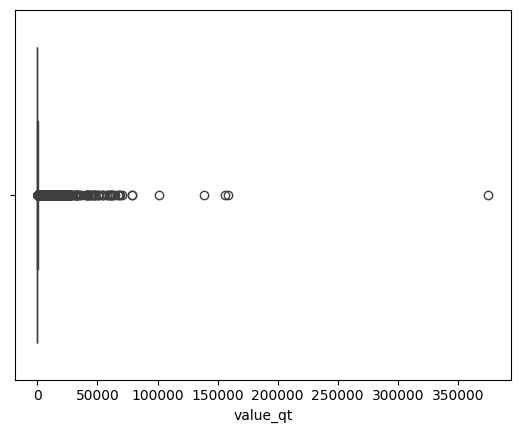

In [163]:
sns.boxplot(x=dataFrame['value_qt'])
plt.show()

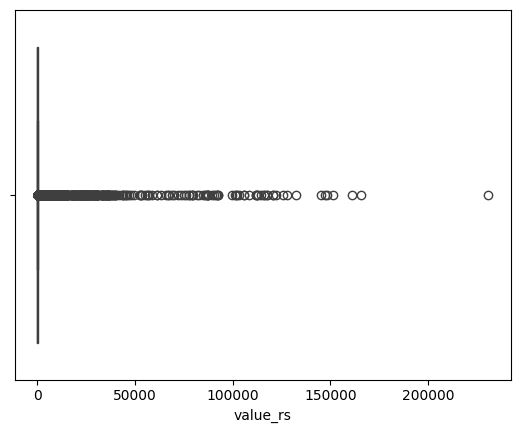

In [164]:
sns.boxplot(x=dataFrame['value_rs'])
plt.show()

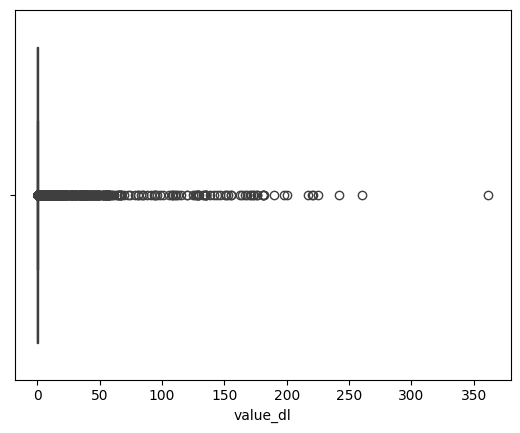

In [165]:
sns.boxplot(x=dataFrame['value_dl'])
plt.show()

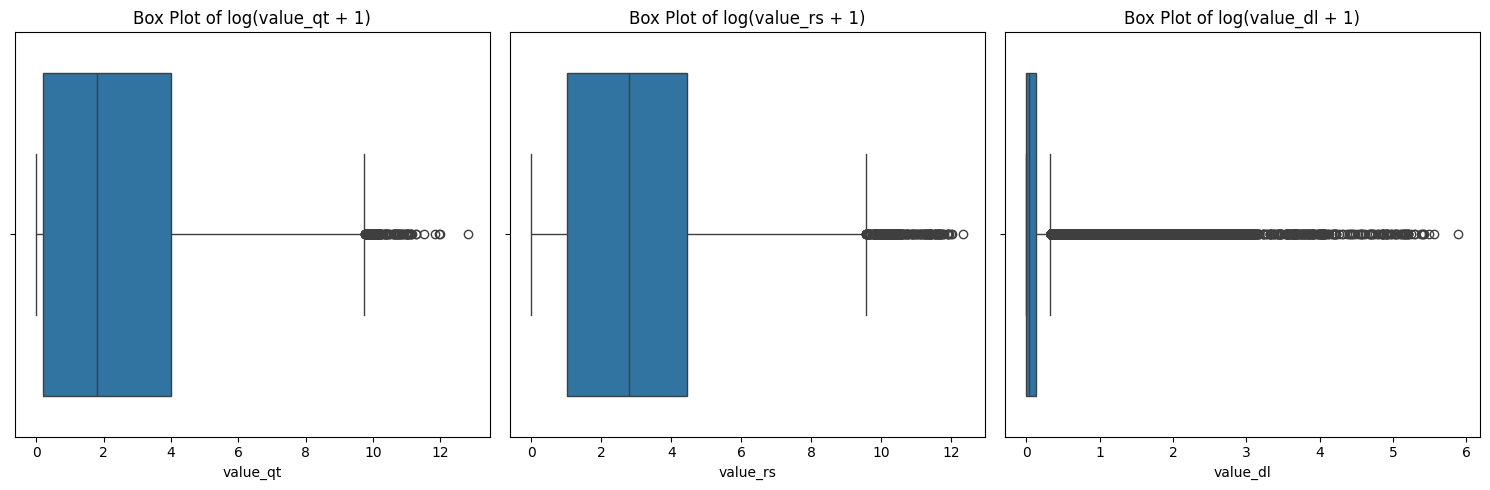

In [166]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for better visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for 'value_qt'
sns.boxplot(x=np.log1p(dataFrame['value_qt']), ax=axes[0])
axes[0].set_title("Box Plot of log(value_qt + 1)")

# Box plot for 'value_rs'
sns.boxplot(x=np.log1p(dataFrame['value_rs']), ax=axes[1])
axes[1].set_title("Box Plot of log(value_rs + 1)")

# Box plot for 'value_dl'
sns.boxplot(x=np.log1p(dataFrame['value_dl']), ax=axes[2])
axes[2].set_title("Box Plot of log(value_dl + 1)")

plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

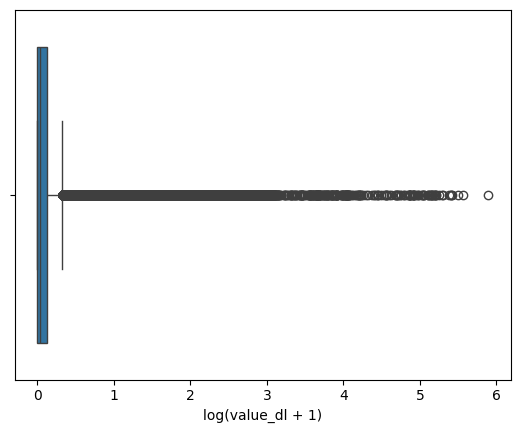

In [167]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add 1 to avoid log(0)
sns.boxplot(x=np.log1p(dataFrame['value_dl']))
plt.xlabel("log(value_dl + 1)")
plt.show()


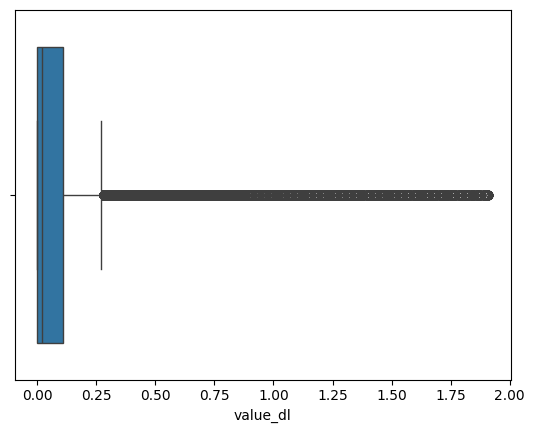

In [168]:
filtered_df = dataFrame[dataFrame['value_dl'] < dataFrame['value_dl'].quantile(0.95)]
sns.boxplot(x=filtered_df['value_dl'])
plt.show()


In [169]:
Q1 = dataFrame['value_dl'].quantile(0.25)
Q3 = dataFrame['value_dl'].quantile(0.75)
IQR = Q3 - Q1

outliers = dataFrame[(dataFrame['value_dl'] < Q1 - 1.5 * IQR) |
                     (dataFrame['value_dl'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")

# Remove
cleaned_df = dataFrame[(dataFrame['value_dl'] >= Q1 - 1.5 * IQR) &
                       (dataFrame['value_dl'] <= Q3 + 1.5 * IQR)]

# OR Cap (Winsorization)
capped_df = dataFrame.copy()
capped_df['value_dl'] = np.clip(dataFrame['value_dl'], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)


Number of outliers: 7782


In [170]:
# Calculate quantiles and IQR for 'value_qt'
Q1_qt = dataFrame['value_qt'].quantile(0.25)
Q3_qt = dataFrame['value_qt'].quantile(0.75)
IQR_qt = Q3_qt - Q1_qt

# Identify outliers in 'value_qt'
outliers_qt = dataFrame[(dataFrame['value_qt'] < Q1_qt - 1.5 * IQR_qt) |
                         (dataFrame['value_qt'] > Q3_qt + 1.5 * IQR_qt)]
print(f"Number of outliers in 'value_qt': {len(outliers_qt)}")


# 1. Remove outliers:
cleaned_df_qt = dataFrame[(dataFrame['value_qt'] >= Q1_qt - 1.5 * IQR_qt) &
                           (dataFrame['value_qt'] <= Q3_qt + 1.5 * IQR_qt)]

# 2. Cap outliers (Winsorization):
capped_df_qt = dataFrame.copy()
capped_df_qt['value_qt'] = np.clip(dataFrame['value_qt'], Q1_qt - 1.5 * IQR_qt, Q3_qt + 1.5 * IQR_qt)

Number of outliers in 'value_qt': 9168


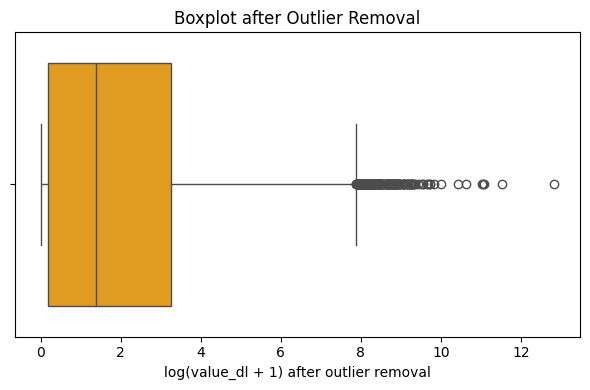

In [171]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=np.log1p(cleaned_df['value_qt']), color='orange')
plt.xlabel("log(value_dl + 1) after outlier removal")
plt.title("Boxplot after Outlier Removal")
plt.tight_layout()
plt.show()

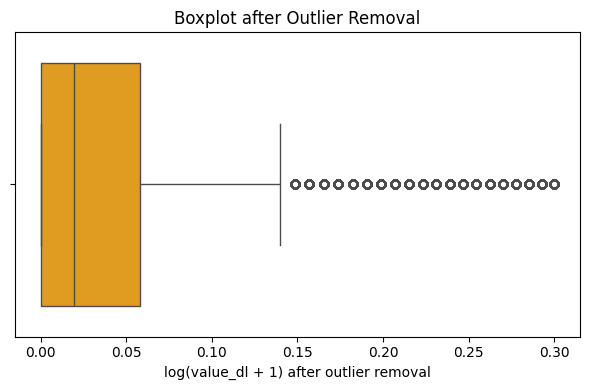

In [172]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=np.log1p(cleaned_df['value_dl']), color='orange')
plt.xlabel("log(value_dl + 1) after outlier removal")
plt.title("Boxplot after Outlier Removal")
plt.tight_layout()
plt.show()

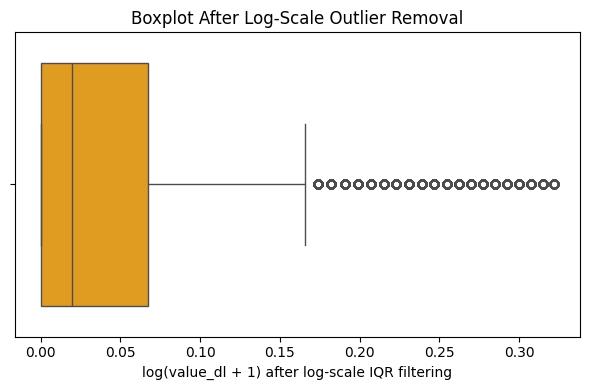

In [173]:
# Log-transform the data
dataFrame['log_value_dl'] = np.log1p(dataFrame['value_dl'])

# Recalculate IQR on log-transformed data
Q1_log = dataFrame['log_value_dl'].quantile(0.25)
Q3_log = dataFrame['log_value_dl'].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Remove outliers based on log scale
filtered_log_df = dataFrame[
    (dataFrame['log_value_dl'] >= Q1_log - 1.5 * IQR_log) &
    (dataFrame['log_value_dl'] <= Q3_log + 1.5 * IQR_log)
]

# Plot cleaned log-transformed boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=filtered_log_df['log_value_dl'], color='orange')
plt.xlabel("log(value_dl + 1) after log-scale IQR filtering")
plt.title("Boxplot After Log-Scale Outlier Removal")
plt.tight_layout()
plt.show()


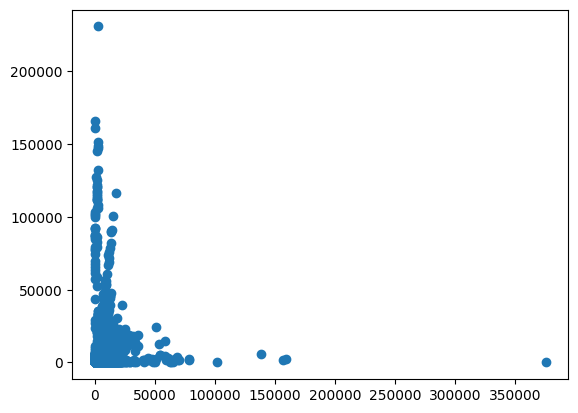

In [174]:
plt.scatter(dataFrame['value_qt'], dataFrame['value_rs'])
plt.show()


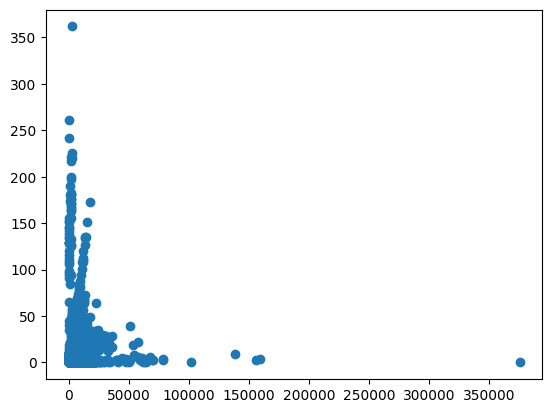

In [175]:
plt.scatter(dataFrame['value_qt'], dataFrame['value_dl'])
plt.show()


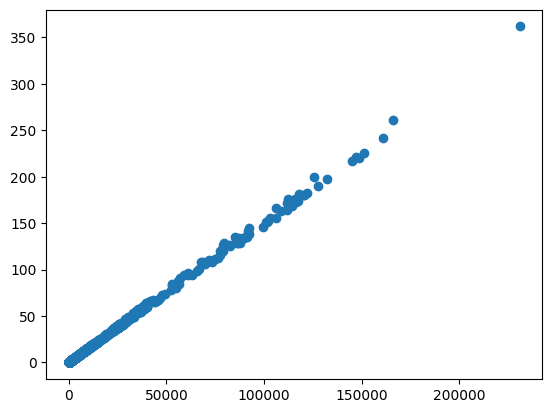

In [176]:
plt.scatter(dataFrame['value_rs'], dataFrame['value_dl'])
plt.show()


In [177]:
from scipy.stats import zscore

z_scores = zscore(dataFrame['value_qt'])
outliers = dataFrame[abs(z_scores) > 3]
print("Outliers:")
print(outliers)


Outliers:
Empty DataFrame
Columns: [id, date, country_name, alpha_3_code, country_code, region, region_code, sub_region, sub_region_code, hs_code, commodity, unit, value_qt, value_rs, value_dl, log_value_dl]
Index: []


# **HANDLING OUTLIERS**

In [178]:

col = 'value_qt'

# Calculating  1st and 99th percentiles
lower = dataFrame[col].quantile(0.01)
upper = dataFrame[col].quantile(0.99)


dataFrame[col] = dataFrame[col].clip(lower, upper)


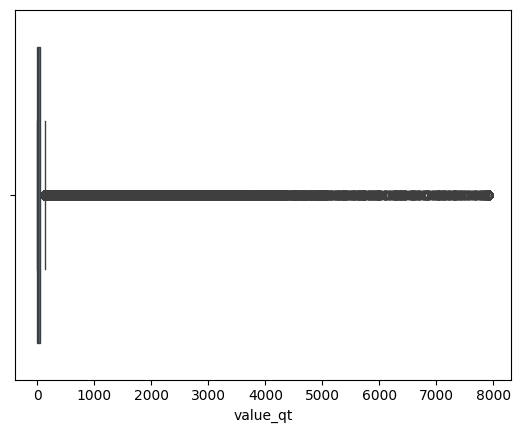

In [179]:
sns.boxplot(x=dataFrame['value_qt'])
plt.show()


In [180]:

col = 'value_rs'

lower = dataFrame[col].quantile(0.01)
upper = dataFrame[col].quantile(0.99)

dataFrame[col] = dataFrame[col].clip(lower, upper)


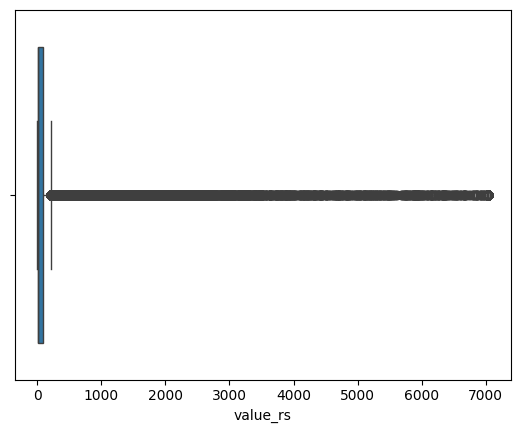

In [181]:
sns.boxplot(x=dataFrame['value_rs'])
plt.show()


In [182]:

col = 'value_dl'

lower = dataFrame[col].quantile(0.01)
upper = dataFrame[col].quantile(0.99)

dataFrame[col] = dataFrame[col].clip(lower, upper)


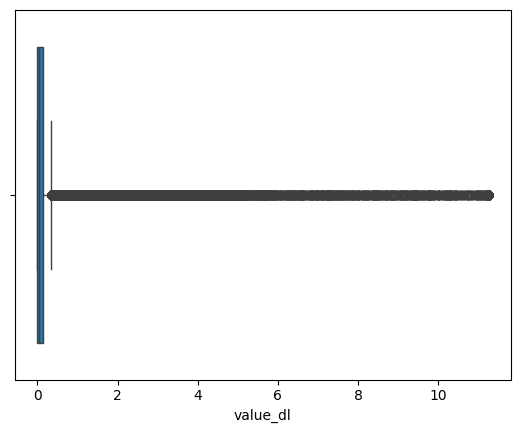

In [183]:
sns.boxplot(x=dataFrame['value_dl'])
plt.show()


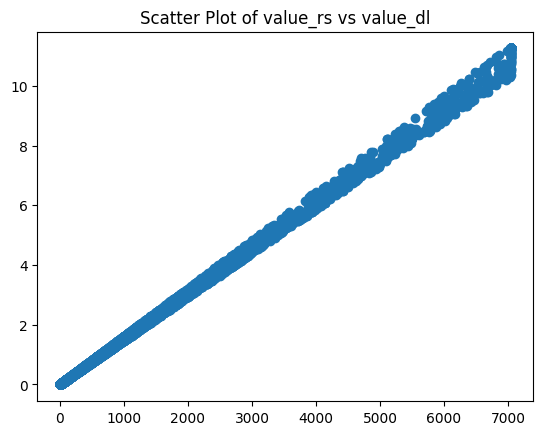

In [184]:
plt.scatter(dataFrame['value_rs'], dataFrame['value_dl'])
plt.title('Scatter Plot of value_rs vs value_dl')
plt.show()


In [185]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['country_name', 'alpha_3_code', 'region', 'sub_region', 'commodity', 'unit']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


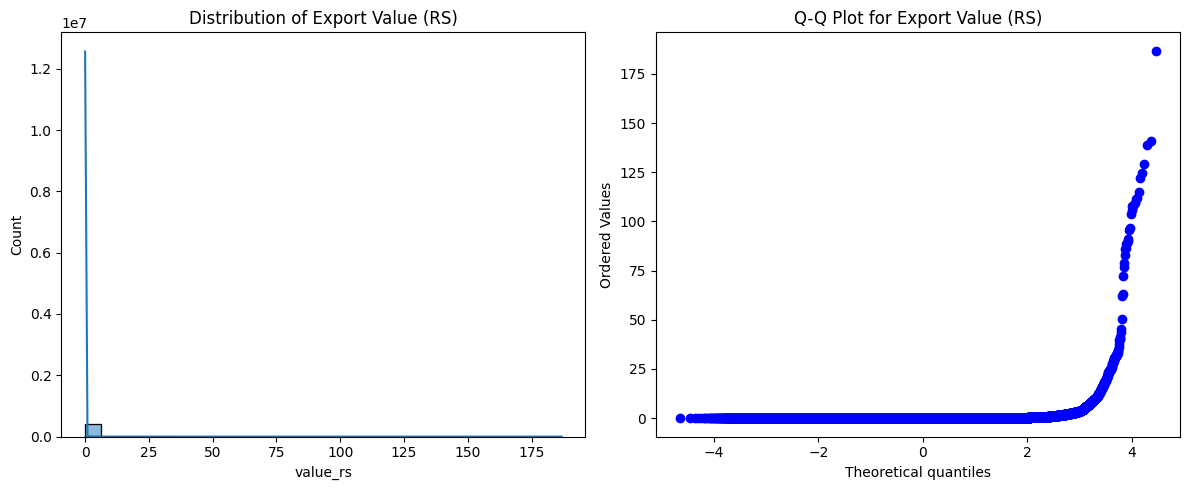

Shapiro-Wilk Test for value_rsa: W=nan, p-value=nan


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Histogram and Q-Q plot for 'value_dl'
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['value_rs'], bins=30, kde=True)
plt.title("Distribution of Export Value (RS)")

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(df['value_rs'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Export Value (RS)")

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
stat, p = shapiro(df['value_rs'])
print(f"Shapiro-Wilk Test for value_rsa: W={stat:.3f}, p-value={p:.3f}")

In [187]:
dataFrame['commodity'].unique()

array(['Other Medcne Put Up For Retail Sale N.E.S', 'Others',
       'Other Sesamum Seeds W/N Broken', 'Guargum Treated And Pulverised',
       'Cucmbrs And Ghrkns Prpd/Prsvd By Acetic Acid', 'Barytes Powder',
       'Natural Garnet', 'Ethylene Glycol (Ethanediol)', 'Other',
       '*Other Polyethylene Terephthalate (Including Clean, Clourless Grades)',
       'Othr Article Of Plastic Nes',
       'Rubber Contraceptives Male(Condoms)',
       '*Surgicle Gloves,Mittens And Mitts', 'Grey',
       'Hessian Cloth Cntng 100% By Wt Of Jute.',
       'Textured Yarn Of Polyesters',
       'Yarn Of Polyester,Prtly Orntd,Untwstd Or Wth A Twist <= 50 Turns Per Mtr, Single',
       'Othr Wven Fbrcs From Strip/The Like',
       'Staple Fibres Of Polyester Nt Crd/Cmbd',
       'Other Yarn Of Polyster Staple Fibrs Mixed Mainly/Solely With Cotton',
       'T-Shirts Etc Of Cotton', 'T-Shirt Etc Of Othr Fibres',
       '*Mens Or Boys Shirts Of Cotton',
       '*Blouses,Shirts And Shirts-Blouses Of Cotto

In [188]:
import pandas as pd

def categorize_commodity(commodity):
    commodity = commodity.lower()

    # Food-related keywords
    if any(word in commodity for word in ['shrimp', 'prawns', 'honey', 'rice', 'flour', 'oil', 'soy', 'cake', 'fruit', 'sugar', 'wheat', 'maize', 'milk', 'butter', 'cheese', 'eggs', 'meat', 'poultry', 'fish', 'seafood', 'vegetables']):
        return 'Food'

    # Textile / Clothing
    elif any(word in commodity for word in ['cotton', 'polyester', 'yarn', 'fiber', 't-shirt', 'underpants', 'linen', 'textile', 'fabric', 'clothing', 'apparel', 'garment']):
        return 'Textile & Clothing'

    # Furniture / Wood
    elif any(word in commodity for word in ['timber', 'granite', 'marble', 'slabs', 'wood', 'planks', 'furniture', 'cabinet', 'table', 'chair']):
        return 'Furniture/Construction'

    # Electronics
    elif any(word in commodity for word in ['electro', 'capacitor', 'resistor', 'transistor', 'circuit', 'electronic', 'computer', 'phone', 'television']):
        return 'Electronics'

    # Medical
    elif any(word in commodity for word in ['syringe', 'needle', 'surgical', 'medicine', 'cardiograph', 'medical', 'drug', 'pharmaceutical', 'hospital']):
        return 'Medical Equipment'

    # Chemical
    elif any(word in commodity for word in ['acid', 'chemical', 'fungicide', 'pesticide', 'benzene', 'fertilizer', 'plastic', 'resin']):
        return 'Chemicals'

    # Metal / Machinery
    elif any(word in commodity for word in ['iron', 'steel', 'alloy', 'manganese', 'copper', 'machinery', 'engine', 'vehicle', 'equipment', 'tool']):
        return 'Metal & Machinery'

    # Plastic & Rubber
    elif any(word in commodity for word in ['plastic', 'polyethylene', 'rubber', 'polymer', 'tire', 'synthetic']):
        return 'Plastic & Rubber'

    # Gems and Jewelry
    elif any(word in commodity for word in ['gold', 'silver', 'diamond', 'gem', 'jewelry']):
        return 'Gems and Jewelry'

    # Mineral Fuels
    elif any(word in commodity for word in ['coal', 'oil', 'gas', 'petroleum', 'fuel']):
        return 'Mineral Fuels'

    elif any(word in commodity for word in ['pen', 'pencil', 'notebook', 'paper', 'stapler', 'ruler', 'scissors', 'eraser', 'marker', 'crayon','Liquid Ink']):
        return 'Stationary'

    # Others
    else:
        return 'Other'


dataFrame['commodity_category'] = dataFrame['commodity'].apply(categorize_commodity)


print(dataFrame['commodity_category'].value_counts())

commodity_category
Other                     40331
Textile & Clothing         4749
Metal & Machinery          2528
Chemicals                  1807
Food                       1536
Stationary                 1007
Plastic & Rubber            748
Medical Equipment           349
Furniture/Construction      173
Name: count, dtype: int64


In [189]:
from scipy.stats import ttest_ind

usa = df[df['country_name'] == 'United States of America']['value_rs']
mexico = df[df['country_name'] == 'Mexico']['value_rs']

t_stat, p_val = ttest_ind(usa, mexico, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: nan, P-value: nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


 The results strongly suggest that the export values of the USA and Mexico are not the same. The average export value for one of these countries is significantly different from the other.

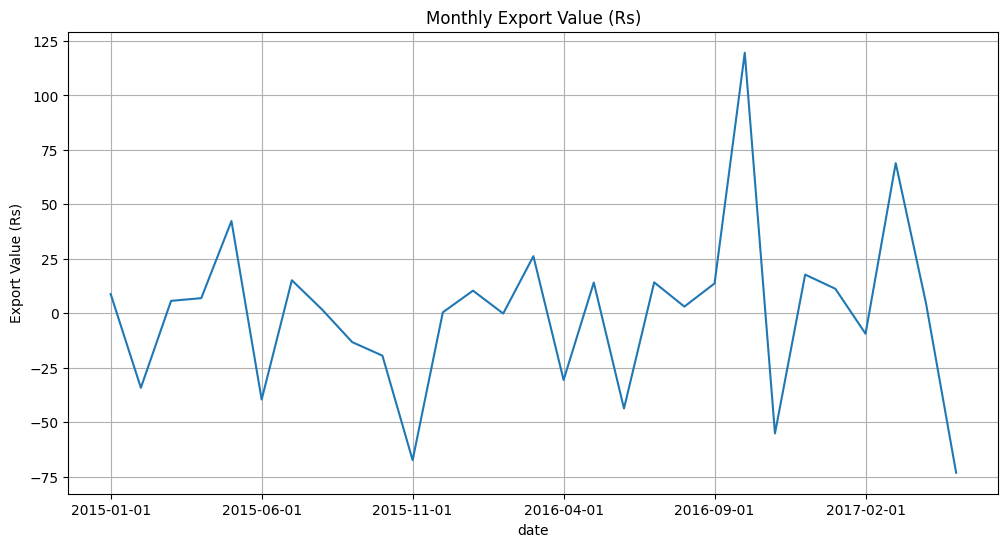

In [190]:
monthly_ts = df.groupby('date')['value_rs'].sum()

# Plot time series
import matplotlib.pyplot as plt
monthly_ts.plot(title="Monthly Export Value (Rs)", figsize=(12,6))
plt.ylabel("Export Value (Rs)")
plt.grid(True)
plt.show()

In [191]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Predicting Export Value

In [198]:
# Fill missing values in 'value_qt', 'value_rs', and 'value_dl' with the median in the original dataFrame
dataFrame['value_qt'] = dataFrame['value_qt'].fillna(dataFrame['value_qt'].median())
dataFrame['value_rs'] = dataFrame['value_rs'].fillna(dataFrame['value_rs'].median())
dataFrame['value_dl'] = dataFrame['value_dl'].fillna(dataFrame['value_dl'].median())


# Encoding categorical variables
dataFrame_encoded = dataFrame.copy()
dataFrame_encoded['commodity'] = LabelEncoder().fit_transform(dataFrame_encoded['commodity'])
dataFrame_encoded['country_name'] = LabelEncoder().fit_transform(dataFrame_encoded['country_name'])


# Features & target
X = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y = dataFrame_encoded['value_dl']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression R²: 0.9989048302054983
Linear Regression RMSE: 0.04887625253664983
Linear Regression MSE: 0.002388888062026369


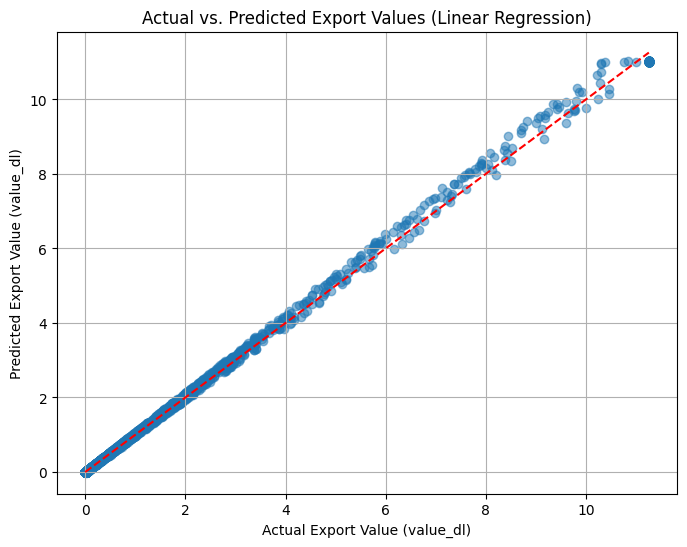

In [199]:
# prompt: geneate the graph for linear regresssion any other graph

import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are available from your previous code
# Example:  y_test and y_pred from the Linear Regression section

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha controls transparency of points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference

plt.xlabel("Actual Export Value (value_dl)")
plt.ylabel("Predicted Export Value (value_dl)")
plt.title("Actual vs. Predicted Export Values (Linear Regression)")
plt.grid(True)
plt.show()


Random Forest R²: 0.9994254681056464
Random Forest RMSE: 0.03540089508499356
Random Forest MSE: 0.0012532233728187213


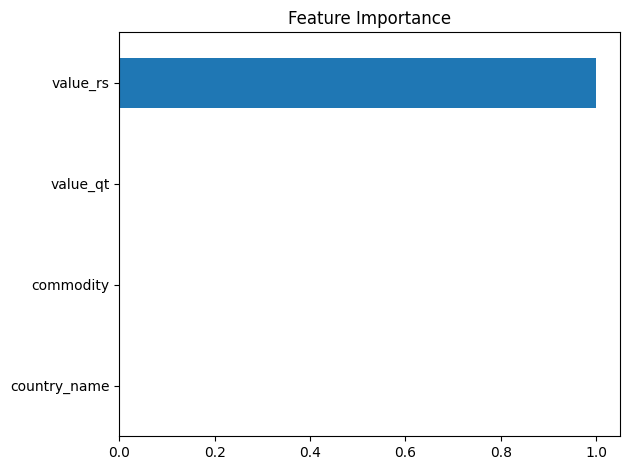

In [200]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

# Feature Importance Plot
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', title="Feature Importance")
plt.tight_layout()
plt.show()


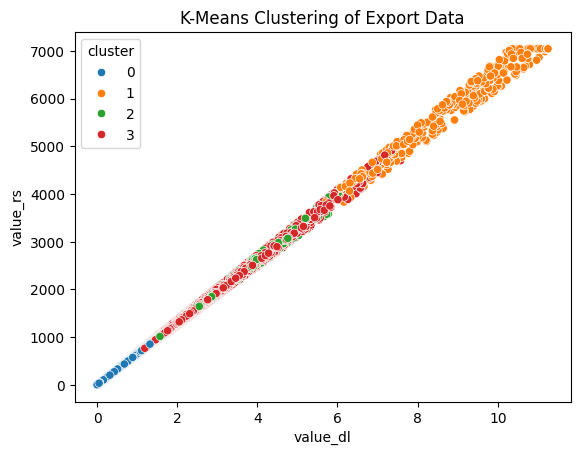

In [201]:
# Clustering on export patterns
X_cluster = dataFrame_encoded[['value_dl', 'value_qt', 'value_rs']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
dataFrame_encoded['cluster'] = kmeans.fit_predict(X_scaled)

# Visualization
sns.scatterplot(data=dataFrame_encoded, x='value_dl', y='value_rs', hue='cluster', palette='tab10')
plt.title("K-Means Clustering of Export Data")
plt.show()


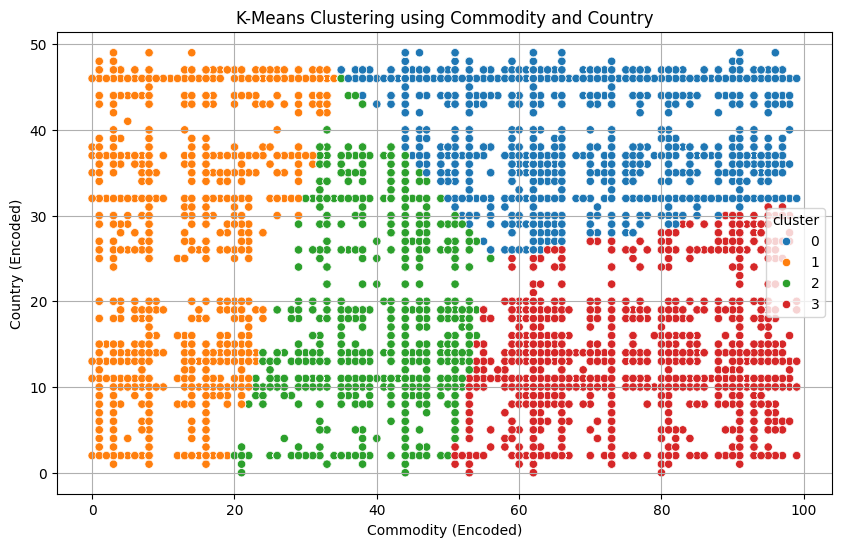

In [202]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
dataFrame_cluster_cat = dataFrame.copy()

# Encode 'commodity' and 'country' as numerical features
dataFrame_cluster_cat['commodity_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['commodity'])
dataFrame_cluster_cat['country_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['country_name'])

# Feature selection
X_cluster_cat = dataFrame_cluster_cat[['commodity_encoded', 'country_encoded']]

# Apply KMeans
kmeans_cat = KMeans(n_clusters=4, random_state=42)
dataFrame_cluster_cat['cluster'] = kmeans_cat.fit_predict(X_cluster_cat)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataFrame_cluster_cat,
    x='commodity_encoded',
    y='country_encoded',
    hue='cluster',
    palette='tab10'
)
plt.title("K-Means Clustering using Commodity and Country")
plt.xlabel("Commodity (Encoded)")
plt.ylabel("Country (Encoded)")
plt.grid(True)
plt.show()


In [203]:
print(dataFrame_cluster_cat['commodity_encoded'])

0        53
1        62
2        55
3        37
4        25
         ..
53227    62
53228    44
53229    44
53230    44
53231    62
Name: commodity_encoded, Length: 53228, dtype: int64


 **Clusters indicate groups of country-commodity pairs that share similar export behavior or patterns**

**Cluster 0 (Blue):** Appears concentrated in high commodity-encoded IDs and across mid-to-high country ranges. This could mean certain countries consistently import/export similar types of commodities.

**Cluster 1 (Orange):** Lies in the middle range for both commodities and countries, possibly showing common trade activities among a central group.

**Cluster 2 (Green):** Occupies the higher commodity ID range but a broad country range, indicating that a particular set of commodities is being traded across many countries.

**Cluster 3 (Red):** Spans low-to-mid commodity IDs and across nearly all countries — suggesting some commodities are universally traded across various countries.

In [204]:
# Binary classification: high export vs low
median_value = dataFrame_encoded['value_dl'].median()
dataFrame_encoded['export_class'] = (dataFrame_encoded['value_dl'] > median_value).astype(int)

X_cls = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y_cls = dataFrame_encoded['export_class']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_cls = log_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_cls))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6009
           1       1.00      1.00      1.00      4637

    accuracy                           1.00     10646
   macro avg       1.00      1.00      1.00     10646
weighted avg       1.00      1.00      1.00     10646



In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create binary classification based on median value
median_value = dataFrame_encoded['value_dl'].median()
dataFrame_encoded['export_class'] = (dataFrame_encoded['value_dl'] > median_value).astype(int)

# Feature selection
X_cls = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y_cls = dataFrame_encoded['export_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_cls = tree_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_cls))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6009
           1       0.99      0.99      0.99      4637

    accuracy                           0.99     10646
   macro avg       0.99      0.99      0.99     10646
weighted avg       0.99      0.99      0.99     10646



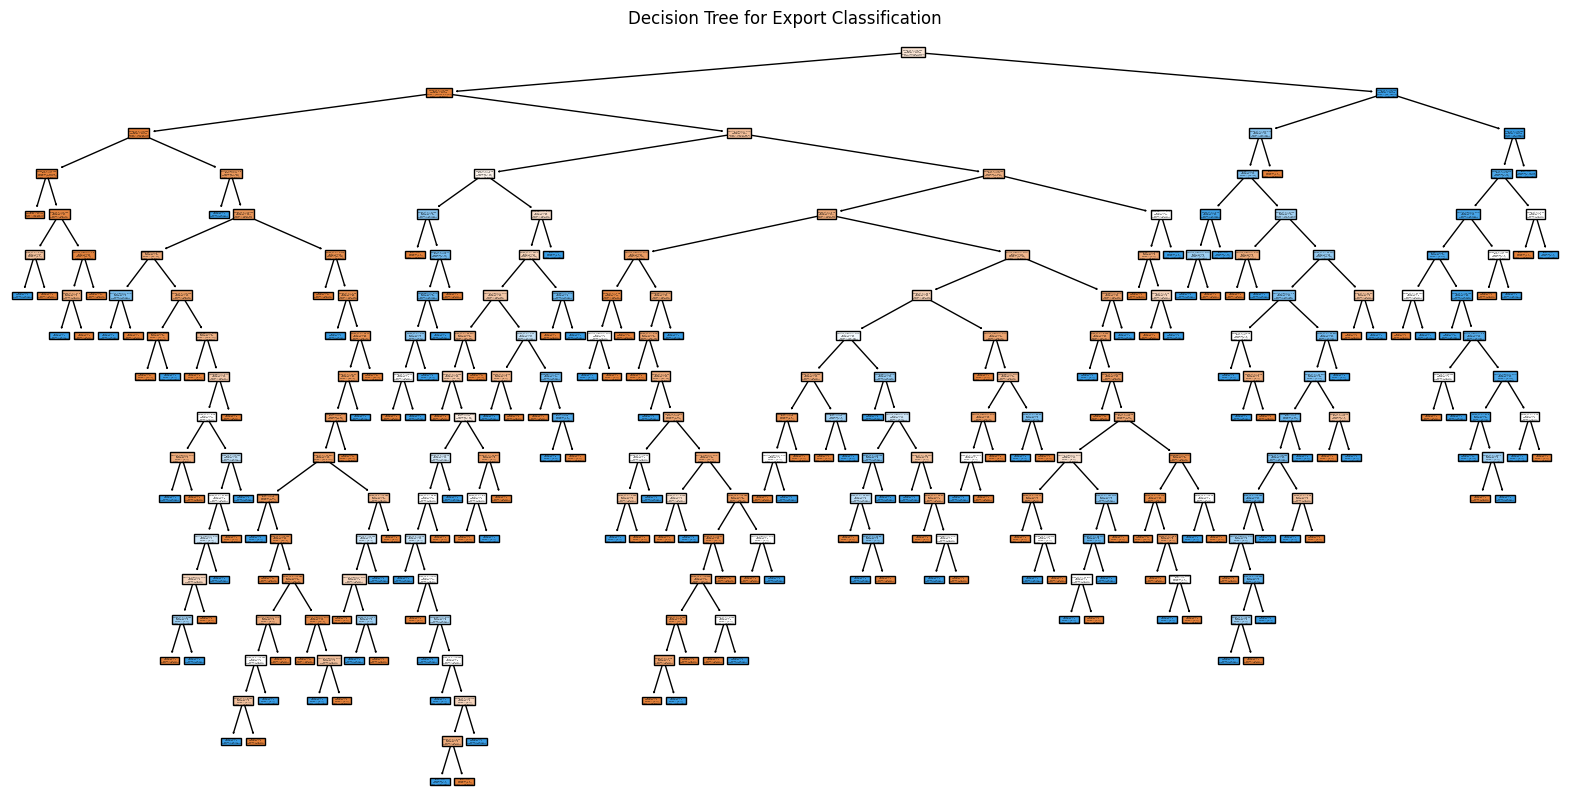

In [206]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_cls.columns, class_names=["Low Export", "High Export"], filled=True)
plt.title("Decision Tree for Export Classification")
plt.show()


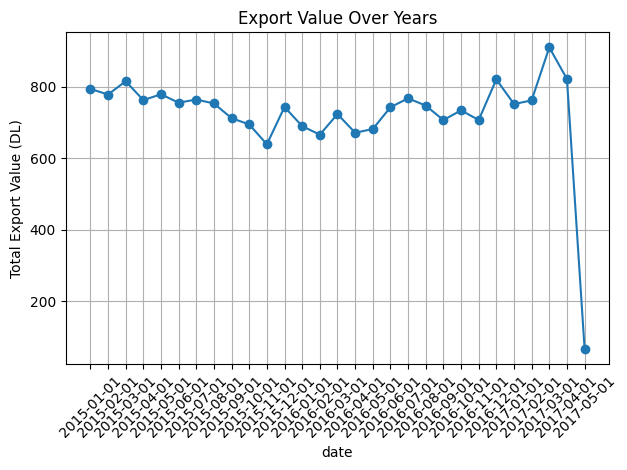

In [207]:
if 'date' in dataFrame.columns:
    df_ts = dataFrame.groupby('date')['value_dl'].sum().reset_index()

    plt.plot(df_ts['date'], df_ts['value_dl'], marker='o')
    plt.title("Export Value Over Years")
    plt.xlabel("date")
    plt.ylabel("Total Export Value (DL)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [208]:
countries = dataFrame['country_name'].unique()
if len(countries) >= 2:
    vals1 = dataFrame[dataFrame['country_name'] == countries[0]]['value_dl']
    vals2 = dataFrame[dataFrame['country_name'] == countries[1]]['value_dl']
    t_stat, p_val = ttest_ind(vals1, vals2, equal_var=False)
    print(f"T-Test between {countries[0]} and {countries[1]}:\nT-Stat={t_stat:.2f}, P-value={p_val:.4f}")


T-Test between Antigua and Barbuda and Argentina:
T-Stat=-13.45, P-value=0.0000


In [209]:
from scipy.stats import f_oneway

commodity_groups = [group['value_dl'].values for _, group in dataFrame.groupby('commodity')]
anova_stat, anova_p = f_oneway(*commodity_groups)
print(f"ANOVA across commodities: F={anova_stat:.2f}, P={anova_p:.4f}")

ANOVA across commodities: F=72.72, P=0.0000
